# For syntax learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import root_mean_squared_log_error, root_mean_squared_error

In [28]:
test_df = pd.DataFrame(
        {
            'store': [1,1,1,1,2,2,2,2],
            'date': list(pd.date_range(start='2017-01-01', periods=2, freq='D')) * 4,
            'sales': np.arange(1, 9, 1)
        }
    )

test_df

,store,date,sales
0,1,2017-01-01,1
1,1,2017-01-02,2
2,1,2017-01-01,3
3,1,2017-01-02,4
4,2,2017-01-01,5
5,2,2017-01-02,6
6,2,2017-01-01,7
7,2,2017-01-02,8


In [36]:
test_df.groupby('store').rolling(2, on='date')['sales'].mean()

store  date      
1      2017-01-01    NaN
       2017-01-02    1.5
       2017-01-01    2.5
       2017-01-02    3.5
2      2017-01-01    NaN
       2017-01-02    5.5
       2017-01-01    6.5
       2017-01-02    7.5
Name: sales, dtype: float64

In [37]:
date_test = test_df.set_index('date')
date_test['sales_shift1d'] = date_test['sales'].shift(1)
date_test.groupby('store')

,store,sales,sales_shift1d
date,,,
2017-01-01,1,1,NaN
2017-01-02,1,2,1.0
2017-01-01,1,3,2.0
2017-01-02,1,4,3.0
2017-01-01,2,5,4.0
2017-01-02,2,6,5.0
2017-01-01,2,7,6.0
2017-01-02,2,8,7.0


In [4]:
test_factorize = pd.DataFrame({'alphabet': [chr(ord('a') + i) for i in range(5)]})
test_factorize

,alphabet
0,a
1,b
2,c
3,d
4,e


# Testing new functions
- Ewm
- Rolling triangular

- Acf

In [10]:
ewm_df = pd.DataFrame({'A': [1,4,9,16,25]})
ewm_df

,A
0,1
1,4
2,9
3,16
4,25


In [13]:
ewm_df.rolling(window=3).mean()

,A
0,NaN
1,NaN
2,4.666667
3,9.666667
4,16.666667


In [11]:
ewm_df.rolling(window=3, win_type='triang').mean()

,A
0,NaN
1,NaN
2,4.5
3,9.5
4,16.5


In [12]:
ewm_df.ewm(alpha=0.5).mean()

,A
0,1.000000
1,3.000000
2,6.428571
3,11.533333
4,18.483871


''

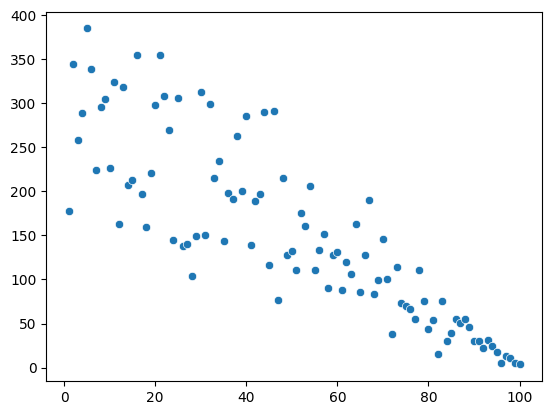

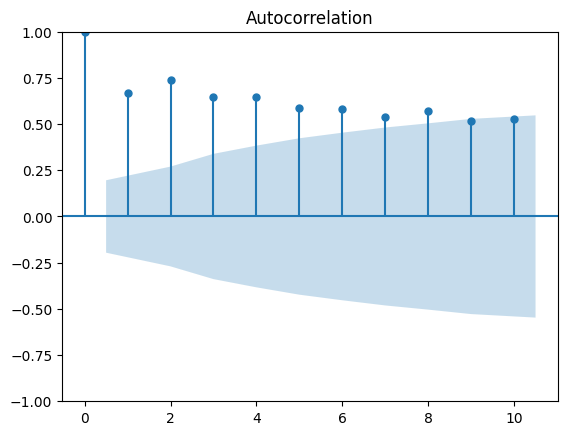

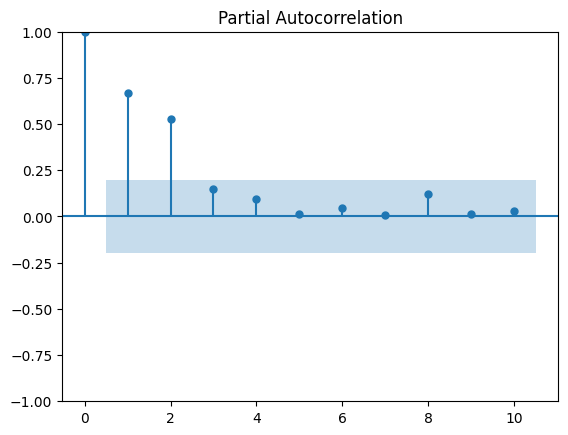

In [38]:
import statsmodels.api as sm

acf_series = np.arange(100, 0, -1) * np.random.normal(3, 1, 100)

sns.scatterplot(x=np.arange(1, len(acf_series)+1), y=acf_series)

sm.graphics.tsa.plot_acf(acf_series, lags=10)
sm.graphics.tsa.plot_pacf(acf_series, lags=10)
;

In [42]:
# Different .rolling win_types

# New sample data with varying values to better illustrate differences
s = pd.Series([2**i for i in range(10)])

# Apply different win_types and calculate the rolling mean
win_types = [None, 'triang', 'boxcar', 'hamming']
window_size=5
results = {'Value': s}
for win in win_types:
    results[win] = s.rolling(window=window_size, win_type=win).mean()

# Combine results into a DataFrame
rolling_results = pd.DataFrame(results)
display(rolling_results)


,Value,None,triang,boxcar,hamming
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN
4,16,6.2,5.444444,6.2,4.803571
5,32,12.4,10.888889,12.4,9.607143
6,64,24.8,21.777778,24.8,19.214286
7,128,49.6,43.555556,49.6,38.428571
8,256,99.2,87.111111,99.2,76.857143
9,512,198.4,174.222222,198.4,153.714286
